masv:22000615
Ho Va Ten: Nguyễn Tấn Anh
Số máy: 50

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [2]:
df=pd.read_csv("./datasets/Tweets.csv")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df=pd.read_csv("TwitterUSAirlineSentiment.csv")
print(df.head(10))

  airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   
5          negative                        1.0000     Can't Tell   
6          positive                        0.6745            NaN   
7           neutral                        0.6340            NaN   
8          positive                        0.6559            NaN   
9          positive                        1.0000            NaN   

   negativereason_confidence         airline        name        text  \
0                        NaN  Virgin America     cairdin     cairdin   
1                     0.0000  Virgin America    jnardino    jnardino   
2                        NaN  Virgi

In [4]:
phan_hoi=df['airline_sentiment'].describe()
print(phan_hoi)

count        14640
unique           3
top       negative
freq          9178
Name: airline_sentiment, dtype: object


In [3]:
df.airline_sentiment.describe()

count        14640
unique           3
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [17]:
mean_1=df['airline_sentiment_confidence'].mean()
print('gia tri trug binh cua airline_sentiment_confidence: ',mean_1)

gia tri trug binh cua airline_sentiment_confidence:  0.9001688524590152


In [16]:
std_1=df['airline_sentiment_confidence'].std()
print('do lech chuan cua airline_sentiment_confidence: ',std_1)

do lech chuan cua airline_sentiment_confidence:  0.1628299590986659


In [15]:
mean_2=df['negativereason_confidence'].mean()
print('gia tri trung binh cua negativereason_confidence',mean_2)

gia tri trung binh cua negativereason_confidence 0.6382982797947114


In [14]:
std_2=df['negativereason_confidence'].std()
print('do lech chuan cua negativereason_confidence: ',std_2)

do lech chuan cua negativereason_confidence:  0.3304397596377413


In [22]:
airline_counts = df['airline'].value_counts()
sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size()

print("Số lượng phản hồi của mỗi hãng máy bay:")
print(airline_counts)
print("\nSố lượng phản hồi mỗi mức độ của từng hãng máy bay:")
print(sentiment_counts)

Số lượng phản hồi của mỗi hãng máy bay:
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Số lượng phản hồi mỗi mức độ của từng hãng máy bay:
airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral            

In [23]:
stats = df.groupby(['airline', 'airline_sentiment']).agg({'airline_sentiment_confidence': ['mean', 'std'], 
                                                            'negativereason_confidence': ['mean', 'std'],
                                                            'user_timezone': lambda x: x.mode()})
print("\nThông tin thống kê:")
print(stats)


Thông tin thống kê:
                                 airline_sentiment_confidence            \
                                                         mean       std   
airline        airline_sentiment                                          
American       negative                              0.944955  0.124992   
               neutral                               0.825938  0.186387   
               positive                              0.882302  0.169425   
Delta          negative                              0.902202  0.162831   
               neutral                               0.829264  0.185266   
               positive                              0.867111  0.177139   
Southwest      negative                              0.920533  0.147741   
               neutral                               0.826109  0.186759   
               positive                              0.886105  0.173846   
US Airways     negative                              0.945714  0.126575   
    

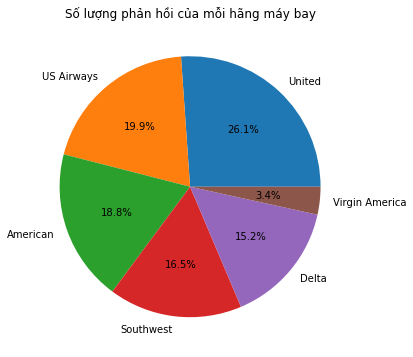

In [25]:
plt.figure(figsize=(8, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%')
plt.title('Số lượng phản hồi của mỗi hãng máy bay')
plt.show()

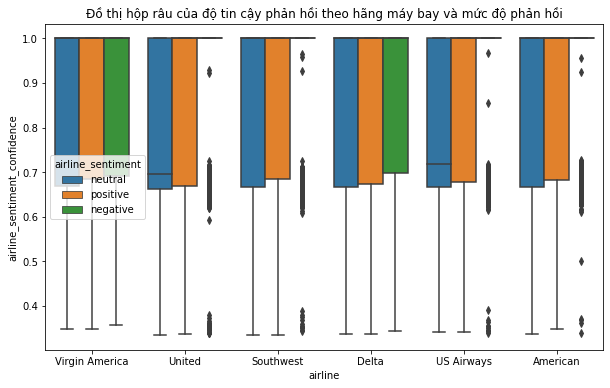

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='airline_sentiment_confidence', data=df, hue='airline_sentiment')
plt.title('Đồ thị hộp râu của độ tin cậy phản hồi theo hãng máy bay và mức độ phản hồi')
plt.show()

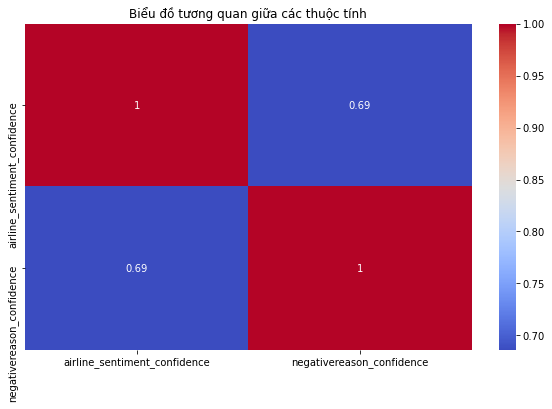

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan giữa các thuộc tính')
plt.show()

In [32]:
# a. Xác suất có đường kính nhỏ hơn 20.3mm
prob_a = norm.cdf(20.3, loc=20, scale=0.2)
print("Xác suất có đường kính nhỏ hơn 20.3mm:", prob_a)

Xác suất có đường kính nhỏ hơn 20.3mm: 0.9331927987311424


In [33]:
# b. Xác suất có đường kính trong khoảng 19.9mm đến 20.3mm
prob_b = norm.cdf(20.3, loc=20, scale=0.2) - norm.cdf(19.9, loc=20, scale=0.2)
print("Xác suất có đường kính trong khoảng 19.9mm đến 20.3mm:", prob_b)

Xác suất có đường kính trong khoảng 19.9mm đến 20.3mm: 0.624655260005158


In [34]:
# c. Xác suất có đường kính sai khác với kỳ vọng không quá 0.3mm
prob_c = norm.cdf(20.3, loc=20, scale=0.2) - norm.cdf(19.7, loc=20, scale=0.2)
print("Xác suất có đường kính sai khác với kỳ vọng không quá 0.3mm:", prob_c)

Xác suất có đường kính sai khác với kỳ vọng không quá 0.3mm: 0.8663855974622847
